In [1]:
"""!pip install "Pillow!=8.3.*,>=5.3.0"
!pip install oauthlib>=3.0.0
!pip install transformers
!pip install transformers[sentencepiece]"""

'!pip install "Pillow!=8.3.*,>=5.3.0"\n!pip install oauthlib>=3.0.0\n!pip install transformers\n!pip install transformers[sentencepiece]'

In [36]:
import torch
import transformers
from transformers import pipeline

In [3]:
classifier = pipeline("sentiment-analysis")
classifier_zero = pipeline("zero-shot-classification")
generator = pipeline("text-generation", model="distilgpt2")
unmasker = pipeline("fill-mask", model="bert-base-uncased")
ner = pipeline("ner", grouped_entities=True)
question_answerer = pipeline("question-answering")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to distilbert/distilroberta-base and revision ec58a5b (https://huggingface.co/distilbert/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at distilbert/distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaFo

In [4]:
classifier(["I've been waiting for a HuggingFace course my whole life.", "I hate this so much!"])

[{'label': 'POSITIVE', 'score': 0.9598049521446228},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

In [6]:
generator(" ")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': '  A man and a woman who had been missing since July 2007 have been shot and killed in eastern Washington, D.C., police and emergency services officials said on Tuesday morning.\n\n\n\n\n\n\n\n\n\n\n\n\n\n'}]

In [7]:
generator(
    "In this course, we will teach you how to",
    max_length=30,
    num_return_sequences=2,
)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "In this course, we will teach you how to set up in practice. Once you've mastered our approach, you'll start to show you how to"},
 {'generated_text': 'In this course, we will teach you how to build your own and maintain a community of skills to meet your needs and contribute towards your vision of the'}]

In [10]:
#unmasker("This course will teach you all about <mask> models.", top_k=2)

[{'score': 0.1961982101202011,
  'token': 30412,
  'token_str': ' mathematical',
  'sequence': 'This course will teach you all about mathematical models.'},
 {'score': 0.04052719473838806,
  'token': 38163,
  'token_str': ' computational',
  'sequence': 'This course will teach you all about computational models.'}]

In [9]:
result = unmasker("This man works as a [MASK].")
print([r["token_str"] for r in result])

result = unmasker("This woman works as a [MASK].")
print([r["token_str"] for r in result])

[' translator', ' consultant', ' bartender', ' waiter', ' courier']
[' waitress', ' translator', ' nurse', ' bartender', ' consultant']


In [11]:
ner("My name is Sylvain and I work at Hugging Face in Brooklyn.")

[{'entity_group': 'PER',
  'score': 0.9981694,
  'word': 'Sylvain',
  'start': 11,
  'end': 18},
 {'entity_group': 'ORG',
  'score': 0.9796019,
  'word': 'Hugging Face',
  'start': 33,
  'end': 45},
 {'entity_group': 'LOC',
  'score': 0.9932106,
  'word': 'Brooklyn',
  'start': 49,
  'end': 57}]

In [12]:
question_answerer(
    question="Where do I work?",
    context="My name is Sylvain and I work at Hugging Face in Brooklyn",
)

{'score': 0.694976270198822, 'start': 33, 'end': 45, 'answer': 'Hugging Face'}

Tutorial 2

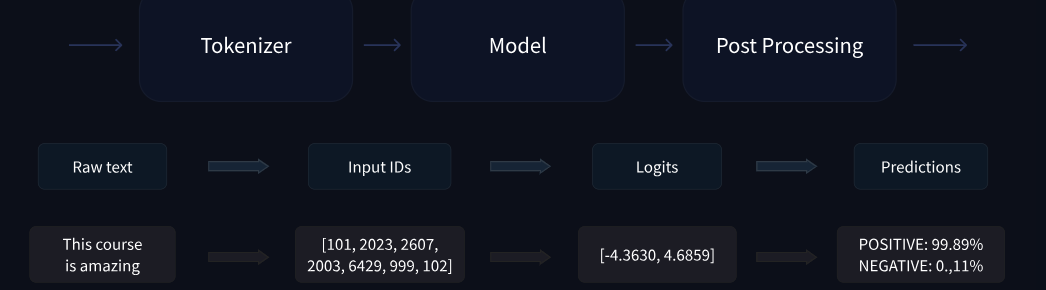

In [18]:
from transformers import AutoTokenizer, AutoModel

In [20]:
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"

In [21]:
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModel.from_pretrained(checkpoint)

In [22]:
raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
]
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
print(inputs)

{'input_ids': tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102],
        [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,     0,
             0,     0,     0,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])}


In [28]:
outputs = model(**inputs)
print(outputs.last_hidden_state.shape) # 2 batchsize, 16 sequence length, 768 hidden state size
#high-dimensional vector representing the contextual understanding of that input by the Transformer model.

torch.Size([2, 16, 768])


In [31]:
from transformers import AutoModelForSequenceClassification
model_diff_input = AutoModelForSequenceClassification.from_pretrained(checkpoint)
print(model_diff_input(**inputs).logits.shape) #Since we have just two sentences and two labels, the result we get from our model is of shape 2 x 2.
model_diff_input.config.id2label
#print(model_diff_input(**inputs).last_hidden_state.shape)

torch.Size([2, 2])


{0: 'NEGATIVE', 1: 'POSITIVE'}

In [33]:
# Can load models like this but would have to train from scratch
from transformers import BertConfig, BertModel

config = BertConfig()
model = BertModel(config)
# model = BertModel.from_pretrained("bert-base-cased")

In [35]:
"""we could replace BertModel with the equivalent AutoModel class. We’ll do this from now on as this produces checkpoint-agnostic 
code; if your code works for one checkpoint, it should work seamlessly with another. This applies even if the architecture is 
different, as long as the checkpoint was trained for a similar task (for example, a sentiment analysis task)."""

'we could replace BertModel with the equivalent AutoModel class. We’ll do this from now on as this produces checkpoint-agnostic \ncode; if your code works for one checkpoint, it should work seamlessly with another. This applies even if the architecture is \ndifferent, as long as the checkpoint was trained for a similar task (for example, a sentiment analysis task).'

In [38]:
sequence = "I've been waiting for a HuggingFace course my whole life."

tokens = tokenizer.tokenize(sequence)
ids = tokenizer.convert_tokens_to_ids(tokens)
input_ids = torch.tensor([ids]) # because the transformer expects multiple sentences by default
print("Input IDs:", input_ids)

output = model_diff_input(input_ids)
print("Logits:", output.logits)

Input IDs: tensor([[ 1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,  2607,
          2026,  2878,  2166,  1012]])
Logits: tensor([[-2.7276,  2.8789]], grad_fn=<AddmmBackward0>)


In [40]:
"""for longer sequences there are 2 ways 
1) either use bigger sequence handling model
2) truncate the sentence

# Will pad the sequences up to the maximum sequence length
model_inputs = tokenizer(sequences, padding="longest")

# Will pad the sequences up to the model max length
# (512 for BERT or DistilBERT)
model_inputs = tokenizer(sequences, padding="max_length")

# Will pad the sequences up to the specified max length
model_inputs = tokenizer(sequences, padding="max_length", max_length=8)"""

'for longer sequences there are 2 ways \n1) either use bigger sequence handling model\n2) truncate the sentence\n\n# Will pad the sequences up to the maximum sequence length\nmodel_inputs = tokenizer(sequences, padding="longest")\n\n# Will pad the sequences up to the model max length\n# (512 for BERT or DistilBERT)\nmodel_inputs = tokenizer(sequences, padding="max_length")\n\n# Will pad the sequences up to the specified max length\nmodel_inputs = tokenizer(sequences, padding="max_length", max_length=8)'